In [29]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

### Load in the data

In [13]:
raptor_data_all = pd.read_csv('../data/historical_RAPTOR_by_team.csv')

### Split the data into Playoff & Reg Season

In [6]:
regular_season_df = raptor_data_all[raptor_data_all['season_type']== 'RS']

### Get the players that played more than 300 mins

In [15]:
regular_season_df = regular_season_df[regular_season_df['mp']>300]

In [16]:
regular_season_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
3,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,0.070322,0.070322,0.0,-2.416858,-0.634025,-3.050883,0.466668
6,Alaa Abdelnaby,abdelal01,1993,RS,BOS,2304,1152,-1.845659,-2.038480,-3.884140,-0.669619,-0.669619,0.0,-1.804417,-1.907295,-3.711713,0.444865
8,Alaa Abdelnaby,abdelal01,1995,RS,SAC,926,476,-2.870680,-0.987076,-3.857756,-0.273787,-0.273787,0.0,-2.839132,-0.608234,-3.447366,1.665034
11,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,15.456216,15.456216,0.0,4.482404,2.556956,7.039361,-0.513828
13,Kareem Abdul-Jabbar,abdulka01,1978,RS,LAL,5064,2265,3.631396,3.605263,7.236659,11.478972,11.478972,0.0,4.130288,2.971010,7.101298,-0.577012


In [7]:
playoffs_df = raptor_data_all[raptor_data_all['season_type']== 'PO']

In [9]:
playoffs_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,PO,POR,26,13,-6.565556,-1.999625,-8.565181,-0.039028,0.0,-0.039028,-6.966437,-4.170021,-11.136458,-1.785247
2,Alaa Abdelnaby,abdelal01,1992,PO,POR,50,25,-5.430838,-3.112862,-8.543700,-0.077215,0.0,-0.077215,-5.722269,-4.144577,-9.866847,1.216643
4,Alaa Abdelnaby,abdelal01,1993,PO,BOS,128,68,-9.774333,-3.596499,-13.370831,-0.381918,0.0,-0.381918,-9.480059,-4.481334,-13.961393,0.456135
10,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,3.032039,0.0,3.032039,6.592019,3.065131,9.657150,-0.432080
12,Kareem Abdul-Jabbar,abdulka01,1978,PO,LAL,279,134,0.111106,0.124225,0.235331,0.209755,0.0,0.209755,0.572892,0.089969,0.662862,-0.369243


### Standardize the data

#### Drop the columns that aren't numeric

In [19]:
stats_only_reg = regular_season_df.drop(columns=['player_name','player_id','season_type','team','poss','mp','war_playoffs'])

In [20]:
standard_scaler = StandardScaler()

In [21]:
rescaled_reg_season = standard_scaler.fit_transform(stats_only_reg)

In [26]:
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(rescaled_reg_season)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(rescaled_reg_season, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.32537356564358355
For n_clusters = 3, silhouette score is 0.23793896942648154
For n_clusters = 4, silhouette score is 0.21857765255329903
For n_clusters = 5, silhouette score is 0.19781890627155624
For n_clusters = 6, silhouette score is 0.19362881686500882
For n_clusters = 7, silhouette score is 0.18852837787858812
For n_clusters = 8, silhouette score is 0.18471672252552387
For n_clusters = 9, silhouette score is 0.17864128003268243
For n_clusters = 10, silhouette score is 0.18381422895050117
For n_clusters = 11, silhouette score is 0.1825096796221182
For n_clusters = 12, silhouette score is 0.1808635712307764
For n_clusters = 13, silhouette score is 0.18228501595346278
For n_clusters = 14, silhouette score is 0.17491339927264893
For n_clusters = 15, silhouette score is 0.17648815495161263
For n_clusters = 16, silhouette score is 0.1767332459717285
For n_clusters = 17, silhouette score is 0.1747883656753564
For n_clusters = 18, silhouette scor

In [27]:
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print("For n_cluster = {}, percent improvement = {}".format(i + 2, improvement))

For n_cluster = 3, percent improvement = -0.1296044622095387
For n_cluster = 4, percent improvement = -0.02540651745256084
For n_cluster = 5, percent improvement = -0.026565334802072016
For n_cluster = 6, percent improvement = -0.0052233709312099474
For n_cluster = 7, percent improvement = -0.006325175171304265
For n_cluster = 8, percent improvement = -0.004697213370320474
For n_cluster = 9, percent improvement = -0.007451940522638312
For n_cluster = 10, percent improvement = 0.0062980385939344075
For n_cluster = 11, percent improvement = -0.0015983485312485168
For n_cluster = 12, percent improvement = -0.002013612088496375
For n_cluster = 13, percent improvement = 0.001735296676796727
For n_cluster = 14, percent improvement = -0.00901489739656558
For n_cluster = 15, percent improvement = 0.001908594416120013
For n_cluster = 16, percent improvement = 0.0002976168728956452
For n_cluster = 17, percent improvement = -0.002362393825398268
For n_cluster = 18, percent improvement = -0.001042

Text(0.5, 0.98, 'Finding the right number of clusters')

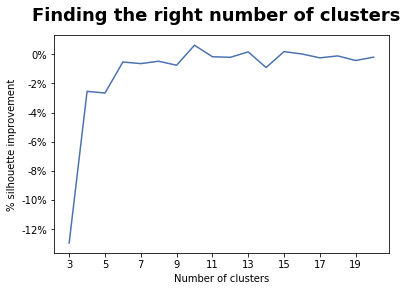

In [30]:
plt.style.use('seaborn-deep')

silhouette_imp_fig, ax = plt.subplots()

ax.plot(range(3, 21), silhouette_diff)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('% silhouette improvement')

ax.set_xticks(np.arange(3, 21, 2.0))

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

silhouette_imp_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 18)

In [65]:
kmeans = KMeans(n_clusters = 7)

kmeans.fit(rescaled_reg_season)

y_kmeans = kmeans.predict(rescaled_reg_season)
kmeans.fit(rescaled_reg_season)

y_kmeans = kmeans.predict(rescaled_reg_season)

In [66]:
regular_season_df['clusters'] = y_kmeans

In [67]:
season_2019 = regular_season_df[regular_season_df['season'] == 2019]

In [75]:
season_2019[season_2019['clusters'] == 1]

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,clusters
767,Giannis Antetokounmpo,antetgi01,2019,RS,MIL,5171,2358,4.184342,2.567988,6.752330,11.572533,11.572533,0.0,4.257098,2.499310,6.756409,1.254684,1
1819,Bradley Beal,bealbr01,2019,RS,WAS,6485,3028,4.314753,-0.940658,3.374096,9.580186,9.580186,0.0,4.347521,-0.622754,3.724767,1.283573,1
2368,Eric Bledsoe,bledser01,2019,RS,MIL,4943,2272,3.478531,2.188776,5.667308,9.811467,9.811467,0.0,3.194151,2.304647,5.498799,0.567570,1
3739,Jimmy Butler,butleji01,2019,RS,PHI,3895,1824,3.199022,1.876309,5.075331,7.217682,7.217682,0.0,2.865997,2.058479,4.924476,-0.904173,1
4988,Mike Conley,conlemi01,2019,RS,MEM,4787,2342,4.605585,1.701337,6.306922,10.755639,10.755639,0.0,3.512719,2.155744,5.668463,-0.625040,1
5621,Stephen Curry,curryst01,2019,RS,GSW,5059,2331,7.482670,0.672822,8.155492,13.263794,13.263794,0.0,8.486090,0.864722,9.350812,2.311394,1
5843,Anthony Davis,davisan02,2019,RS,NOP,3998,1850,4.105122,3.275085,7.380207,9.609615,9.609615,0.0,4.307411,3.020674,7.328085,0.511793,1
6780,Andre Drummond,drumman01,2019,RS,DET,5413,2647,0.959801,3.064596,4.024397,9.140505,9.140505,0.0,1.338190,3.528537,4.866728,-0.092621,1
7041,Kevin Durant,duranke01,2019,RS,GSW,5817,2702,4.971488,-0.175648,4.795840,10.519779,10.519779,0.0,5.719840,-0.698417,5.021423,1.150005,1
7450,Joel Embiid,embiijo01,2019,RS,PHI,4663,2154,2.628670,3.590693,6.219363,9.917043,9.917043,0.0,3.272134,2.773190,6.045324,0.620095,1


In [78]:
regular_season_df

,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,clusters
season,1.000000,-0.158281,-0.100084,0.011112,0.020257,0.019663,-0.032154,-0.032154,NaN,0.013920,0.016945,0.019166,-0.049057,0.539342
poss,-0.158281,1.000000,0.992593,0.551905,0.233338,0.565787,0.708932,0.708932,NaN,0.580418,0.341151,0.612596,-0.360996,0.001411
mp,-0.100084,0.992593,1.000000,0.557450,0.240529,0.574047,0.717930,0.717930,NaN,0.586075,0.349250,0.621005,-0.371464,0.035352
raptor_offense,0.011112,0.551905,0.557450,1.000000,0.090195,0.848339,0.783410,0.783410,NaN,0.988552,0.178074,0.837591,-0.229925,0.114457
raptor_defense,0.020257,0.233338,0.240529,0.090195,1.000000,0.603812,0.487503,0.487503,NaN,0.126571,0.958913,0.585249,-0.064536,0.083593
raptor_total,0.019663,0.565787,0.574047,0.848339,0.603812,1.000000,0.886200,0.886200,NaN,0.858514,0.652306,0.981530,-0.218338,0.136049
war_total,-0.032154,0.708932,0.717930,0.783410,0.487503,0.886200,1.000000,1.000000,NaN,0.806093,0.552406,0.890924,-0.246737,0.018741
war_reg_season,-0.032154,0.708932,0.717930,0.783410,0.487503,0.886200,1.000000,1.000000,NaN,0.806093,0.552406,0.890924,-0.246737,0.018741
war_playoffs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
predator_offense,0.013920,0.580418,0.586075,0.988552,0.126571,0.858514,0.806093,0.806093,NaN,1.000000,0.218790,0.867029,-0.202079,0.112750
